중간고사 과제 2

- 주어진 영상에 대하여 아래 순서에 따라 다양한 보간법에 의하여 2배 큰 영상을 구하시오

In [ ]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving test.jpeg to test.jpeg
User uploaded file "test.jpeg" with length 47100 bytes


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

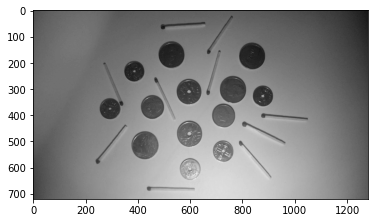

In [ ]:
input_img = cv2.imread('test.jpeg')


gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, 'gray')
plt.show()


이미지 resize(크기조정)

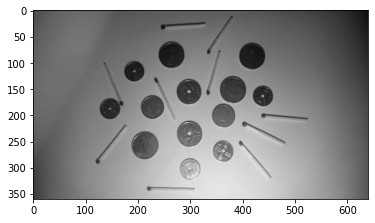

(360, 640)

In [ ]:
scale_percent = 50 # percent of original size
width = int(gray_img.shape[1] * scale_percent / 100)
height = int(gray_img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(gray_img, dim, interpolation = cv2.INTER_AREA)

plt.imshow(img, 'gray')
plt.show()

img.shape


1. Nearest Neighbor Interpolation
- 가장 가까운 값으로 채우는 방법
- Nearest Neighbor Interpolation으로 2배 큰 영상을 만든 후에 가시화하시오
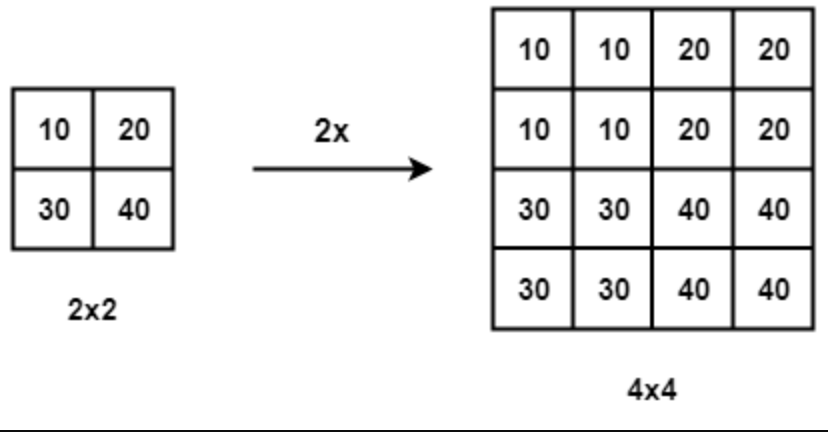

1-1 Nearest Neighbor Interpolation을 이용하여 2배로 영상을 확대하였을 때의 결과를 출력하시오

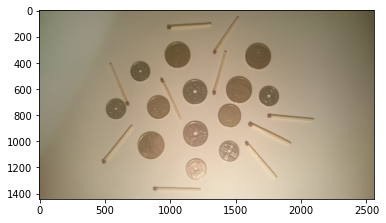

(1440, 2560, 3)

In [ ]:
#Nearest Neighbor Interpotation 함수를 작성하시오
def nn_interpolate(img, ax, ay): 
    H, W, C = img.shape 
    aH = int(ay * H) 
    aW = int(ax * W) 
    y = np.arange(aH).repeat(aW).reshape(aH, -1) 
    x = np.tile(np.arange(aW), (aH, 1)) 
    y = (y / ay).astype(np.int64) 
    x = (x / ax).astype(np.int64) 

    
    out = img[y,x]
    out = out.astype(np.uint8) 
    return out  


#2배 확대하였을 때 영상을 가시화 하시오
img = cv2.imread("test.jpeg")
scale_img = nn_interpolate(img, ax=2, ay=2)
cvt_img = cv2.cvtColor(scale_img, cv2.COLOR_BGR2RGB)

plt.imshow(cvt_img) 
plt.show()

cvt_img.shape

1-2 Nearest Neighbor Interpolation을 이용하여 4배로 영상을 확대하였을 때의 결과를 출력하시오

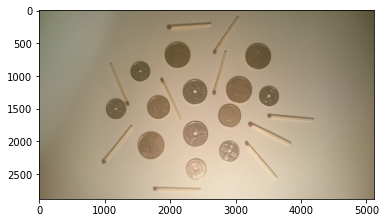

(2880, 5120, 3)

In [ ]:
#4배 확대하였을 때 영상을 가시화 하시오
scale_img = nn_interpolate(img, ax=4, ay=4)
cvt_img = cv2.cvtColor(scale_img, cv2.COLOR_BGR2RGB)

plt.imshow(cvt_img) 
plt.show()

cvt_img.shape

2. Bilinear Interpolation
- 주변 값으로 채우는 방법
- Biinear Interpolation으로 2배 큰 영상을 만든 후에 가시화하시오

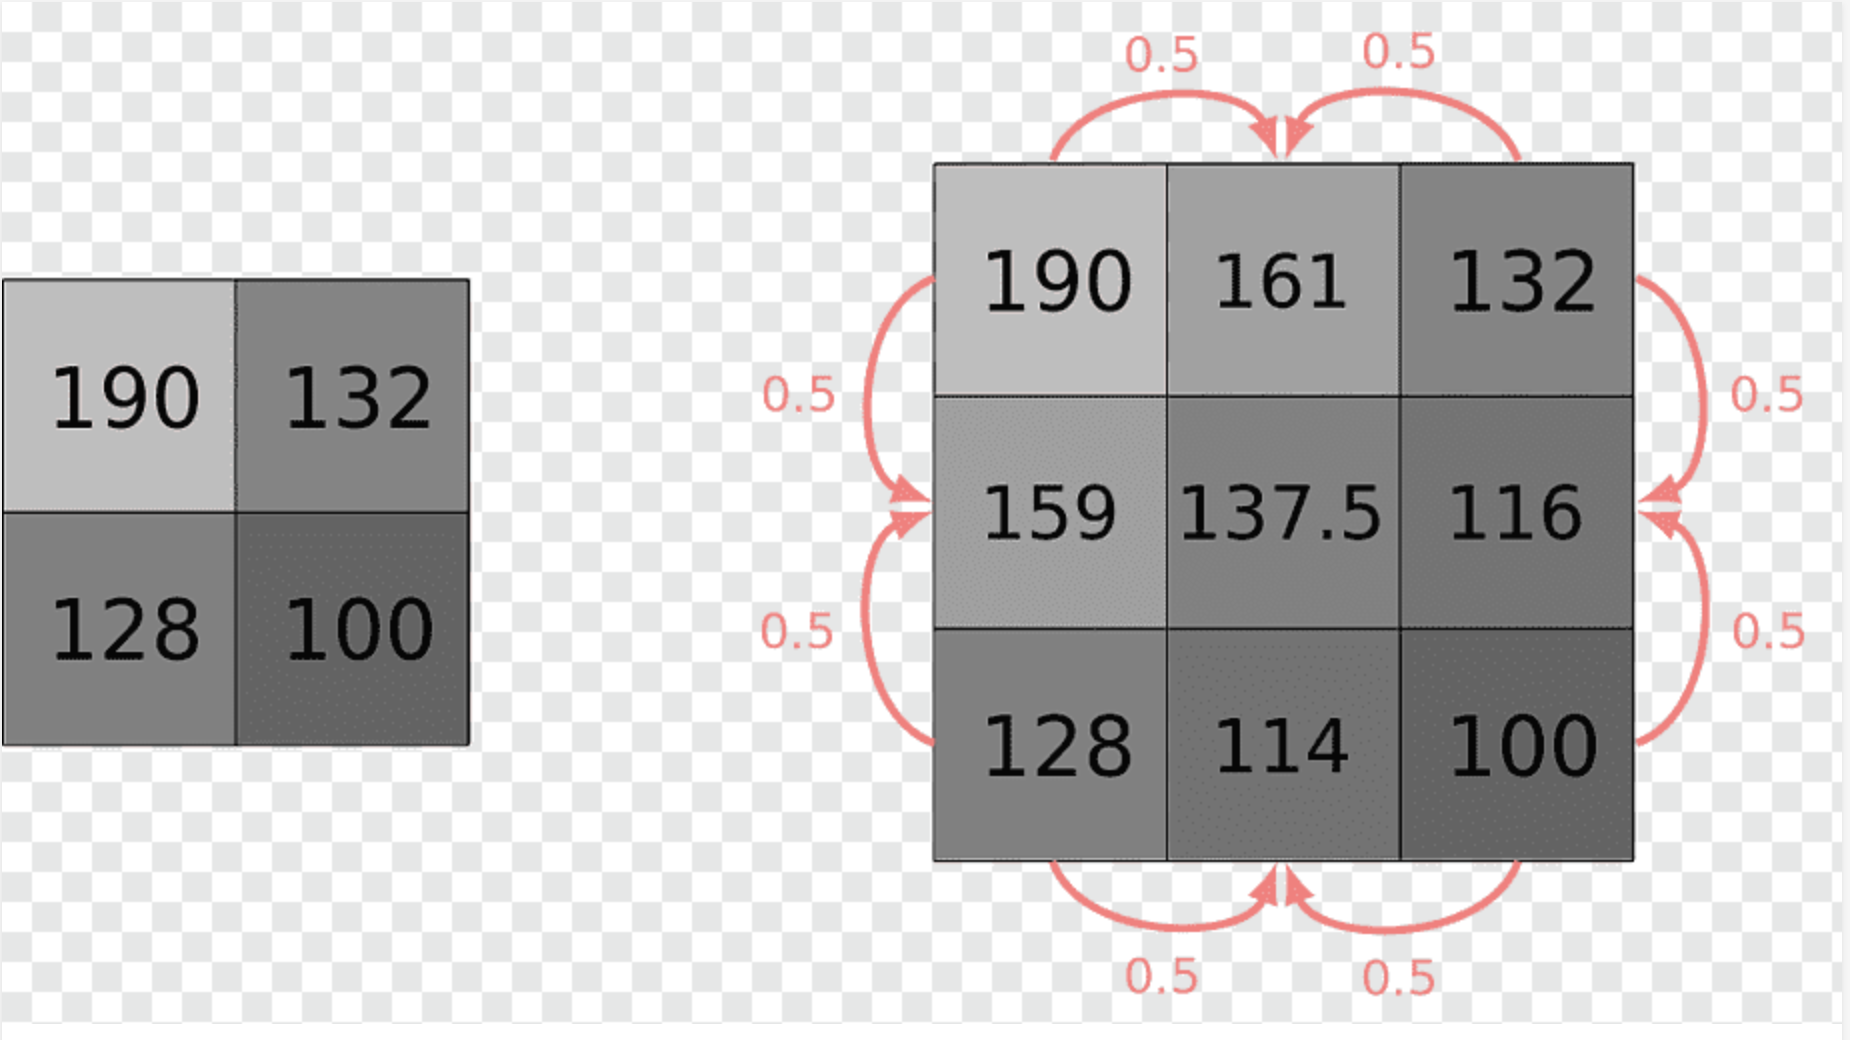

2-1 Bilinear Interpolation을 이용하여 2배로 영상을 확대하였을 때의 결과를 출력하시오

Bilinear에 대하여 다음 그림과 수식을 이용하여 구하시요
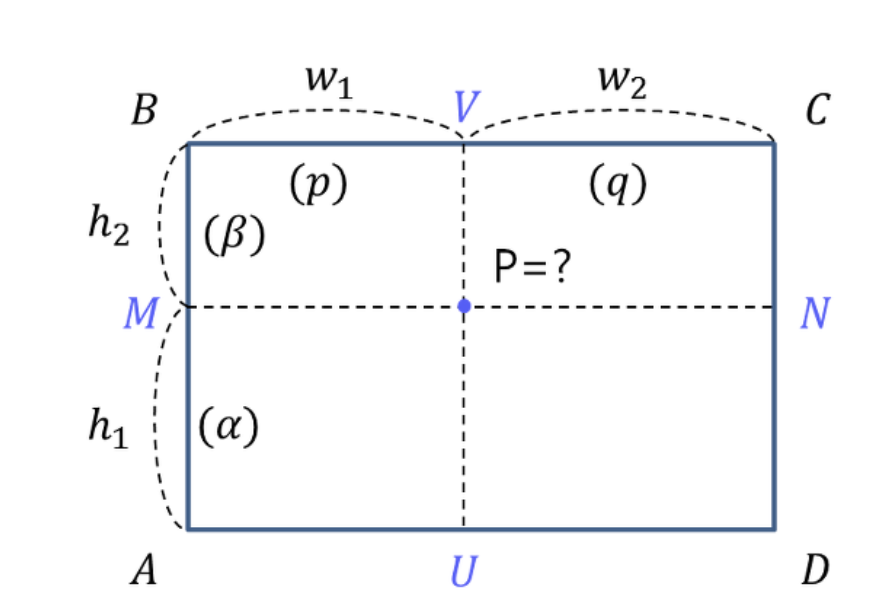

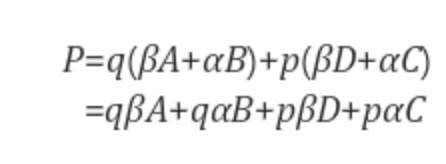

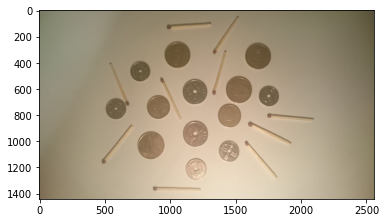

(1440, 2560, 3)

In [ ]:
#Bilnear Interpotation 함수를 작성하시오
def bl_interpolate(img, ax, ay):
    H, W, C = img.shape 
    aH = int(ay * H) 
    aW = int(ax * W) 
    y = np.arange(aH).repeat(aW).reshape(aH, -1)
    x = np.tile(np.arange(aW), (aH, 1))
    y = (y / ay) 
    x = (x / ax) 
    ix = np.floor(x).astype(np.int64) 
    iy = np.floor(y).astype(np.int64) 
    ix = np.minimum(ix, W-2) 
    iy = np.minimum(iy, H-2) 

    dx = x - ix 
    dy = y - iy 
    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1) 
    dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1) 
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1] 
    out = np.clip(out, 0, 255) 
    out = out.astype(np.uint8) 
    return out

#2배 확대하였을 때 영상을 가시화 하시오

img = cv2.imread("test.jpeg")
out = bl_interpolate(img, ax=2, ay=2) 
cvt_img = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.imshow(cvt_img) 
plt.show()

cvt_img.shape

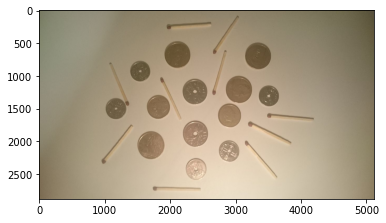

(2880, 5120, 3)

In [ ]:
#4배 확대하였을 때 영상을 가시화 하시오
out = bl_interpolate(img, ax=4, ay=4) 
cvt_img = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

plt.imshow(cvt_img) 
plt.show()

cvt_img.shape